<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/gao

/content/gdrive/MyDrive/Colab Notebooks/gao


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/gao/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1000 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/gao/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 250 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
test_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1)

32/32 [==============================] - 7s 227ms/step - loss: 0.0263 - accuracy: 0.9870
Epoch 90/100
32/32 [==============================] - 7s 229ms/step - loss: 0.0113 - accuracy: 0.9940
Epoch 91/100
32/32 [==============================] - 7s 234ms/step - loss: 0.0122 - accuracy: 0.9970
Epoch 92/100
32/32 [==============================] - 8s 258ms/step - loss: 0.0249 - accuracy: 0.9910
Epoch 93/100
32/32 [==============================] - 7s 228ms/step - loss: 0.0321 - accuracy: 0.9900
Epoch 94/100
32/32 [==============================] - 7s 228ms/step - loss: 0.0207 - accuracy: 0.9910
Epoch 95/100
32/32 [==============================] - 7s 233ms/step - loss: 0.0360 - accuracy: 0.9840
Epoch 96/100
32/32 [==============================] - 7s 225ms/step - loss: 0.0282 - accuracy: 0.9880
Epoch 97/100
32/32 [==============================] - 7s 224ms/step - loss: 0.0398 - accuracy: 0.9870
Epoch 98/100
32/32 [==============================] - 7s 232ms/step - loss: 0.0250 - accuracy: 

In [ ]:
model.save('GAO.h5')

In [ ]:
model_gao = load_model('GAO.h5')

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.013696493580937386
Train Accuracy 0.9940000176429749


1/1 [==============================] - 0s 139ms/step
Đây là loại gạo : Jasmine


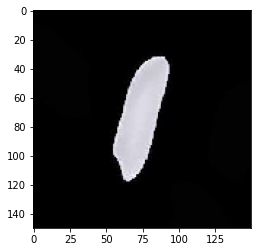

In [ ]:
img = load_img('/content/1.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_gao=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là loại gạo :", class_gao[a])

1/1 [==============================] - 0s 59ms/step
Đây là loại gạo : Arborio


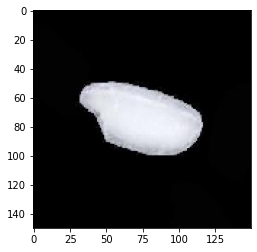

In [ ]:
img = load_img('/content/2.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_gao=['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là loại gạo :", class_gao[a])

In [ ]:
!jupyter nbconvert --to html "/content/gao.ipynb"

[NbConvertApp] Converting notebook /content/gao.ipynb to html
[NbConvertApp] Writing 342904 bytes to /content/gao.html
